<a href="https://colab.research.google.com/github/Longsieunhan/IA-Project/blob/master/Handwritten_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load MNIST dataset


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Normalize the data


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0



In [6]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
print(X_train.min(), X_train.max())

0.0 1.0


# Split into training and validation sets


In [8]:
# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

###Visualize Sample Data



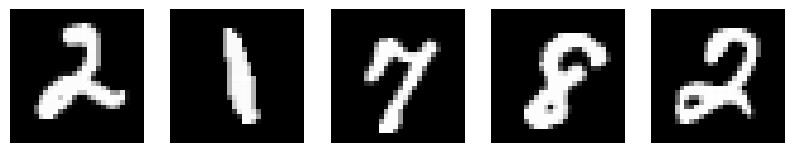

In [9]:
# Visualize some samples
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.show()


# Define input shape
input_shape = (28, 28)


In [10]:
# Model 1: Simple Dense Network
model_1 = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#A simple model with one hidden layer (128 neurons, ReLU activation).
#The output layer has 10 neurons (one per class) with softmax activation.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Model 2: Deeper Network
model_2 = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

#Adds an extra hidden layer (256 neurons → 128 neurons → output layer).


In [12]:
# Model 3:  deeper
model_3 = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

#Uses 512 neurons in the first layer and 256 neurons in the second layer.


###Compile & Train with Different Optimizers


In [13]:

# Compile models
models = [model_1, model_2, model_3]
optimizers = ['sgd', 'adam']
histories = {}

for i, model in enumerate(models):
    for opt in optimizers:
        model.compile(
            optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_valid, y_valid),
            batch_size=512,
            epochs=20,
            callbacks=[early_stopping]
        )
        histories[f'model_{i+1}_{opt}'] = history

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2580 - loss: 2.1589 - val_accuracy: 0.6603 - val_loss: 1.6361
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6908 - loss: 1.5023 - val_accuracy: 0.7589 - val_loss: 1.1786
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7794 - loss: 1.0993 - val_accuracy: 0.8038 - val_loss: 0.9157
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8198 - loss: 0.8638 - val_accuracy: 0.8269 - val_loss: 0.7644
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8380 - loss: 0.7320 - val_accuracy: 0.8432 - val_loss: 0.6702
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8480 - loss: 0.6520 - val_accuracy: 0.8537 - val_loss: 0.6069
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8615 - loss: 0.5905 - val_accuracy: 0.8606 - val_loss: 0.5615
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8656 - loss: 0.5493 - val_accuracy: 0.8668 - v

# Plot accuracy and loss


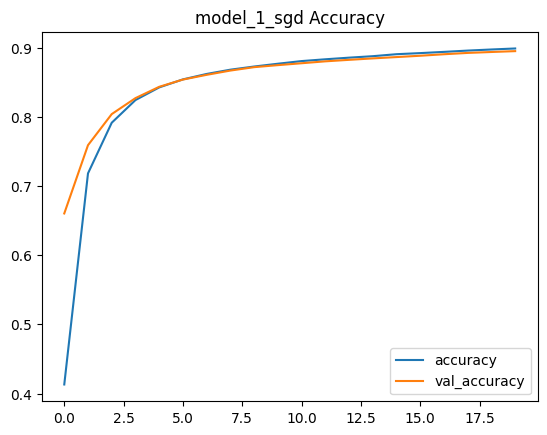

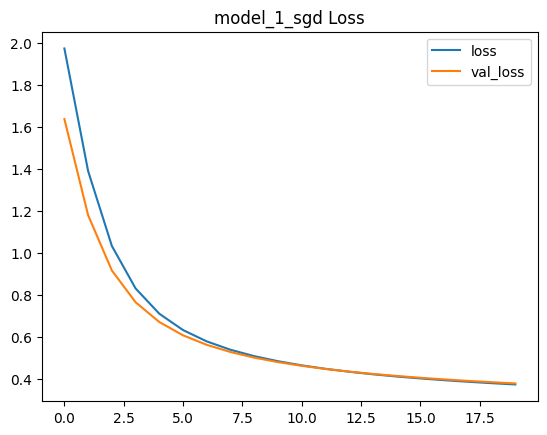

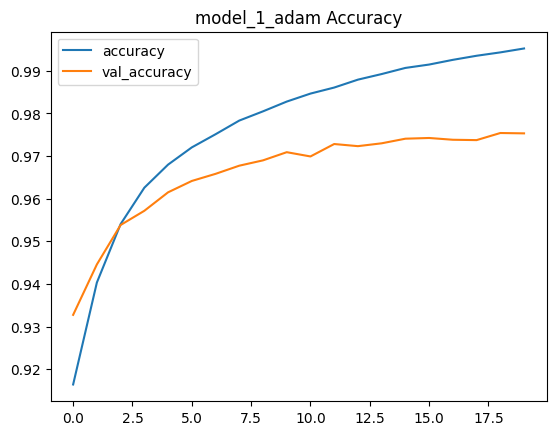

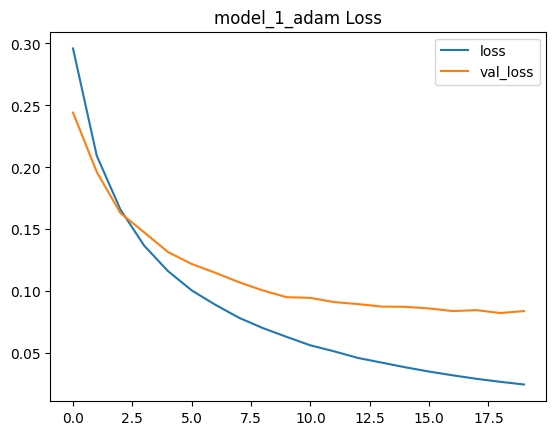

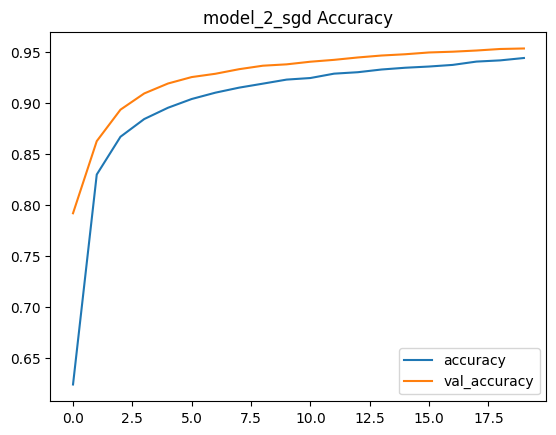

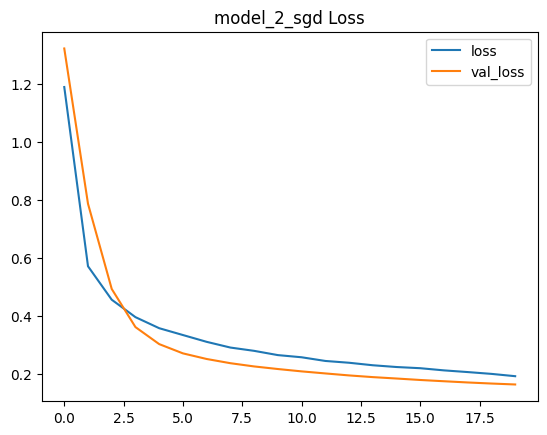

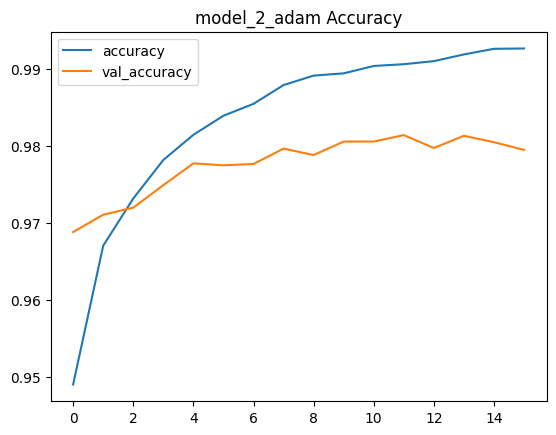

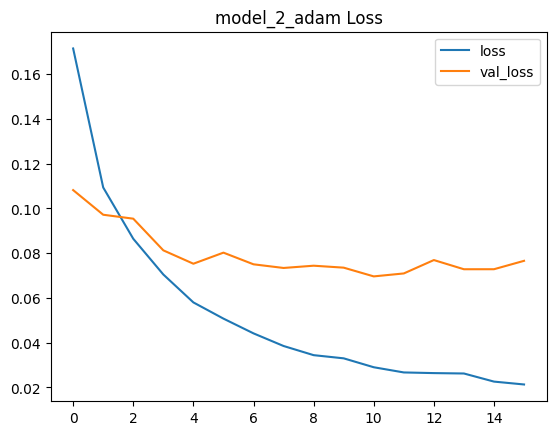

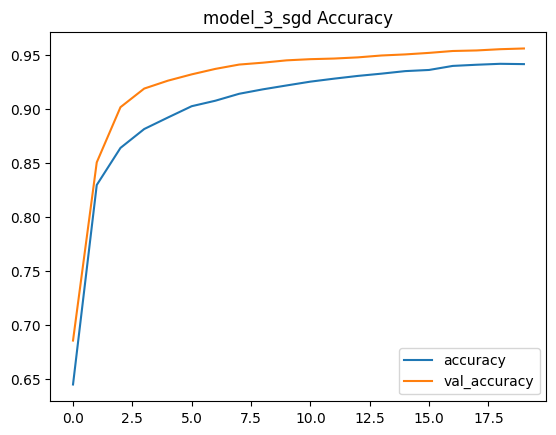

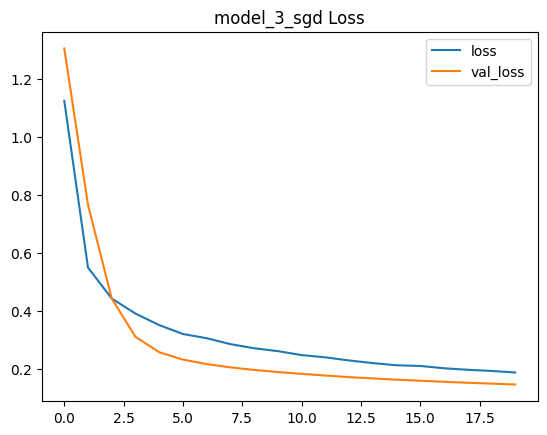

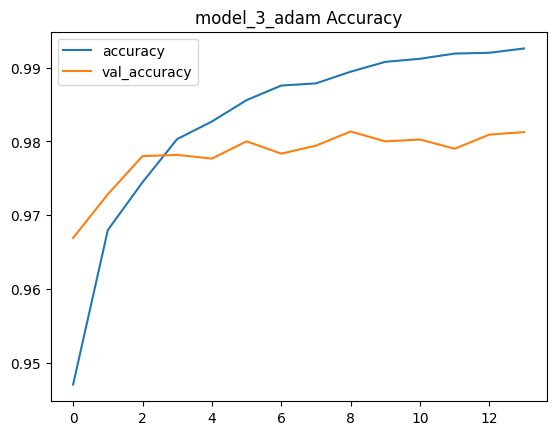

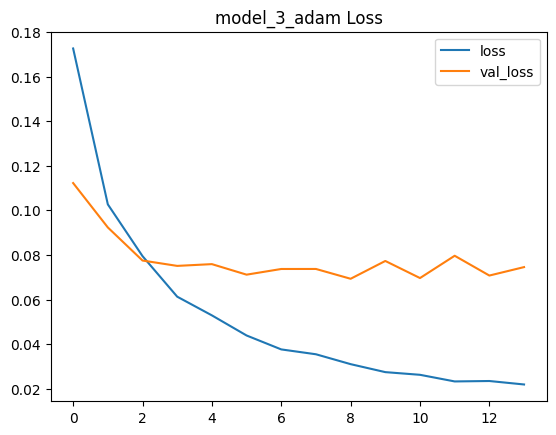

In [14]:
# Plot accuracy and loss
for key, history in histories.items():
    history_df = pd.DataFrame(history.history)
    history_df[['accuracy', 'val_accuracy']].plot(title=f"{key} Accuracy")
    history_df[['loss', 'val_loss']].plot(title=f"{key} Loss")
    plt.show()

In [15]:
# Evaluate on test set
for key, model in zip(histories.keys(), models):
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"{key} - Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0898
model_1_sgd - Test Accuracy: 0.9767
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9771 - loss: 0.0754
model_1_adam - Test Accuracy: 0.9808
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9764 - loss: 0.0788
model_2_sgd - Test Accuracy: 0.9805


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


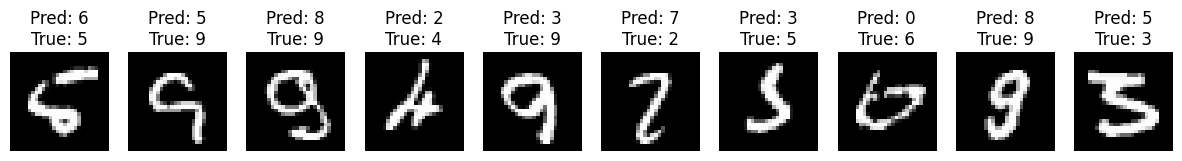

In [16]:
# Visualizing incorrect predictions
import numpy as np
preds = models[1].predict(X_test).argmax(axis=1)
incorrect_indices = np.where(preds != y_test)[0][:10]

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test[incorrect_indices[i]], cmap='gray')
    ax.set_title(f"Pred: {preds[incorrect_indices[i]]}\nTrue: {y_test[incorrect_indices[i]]}")
    ax.axis('off')
plt.show()

### Conclusion


Based on the graph, it is observed that the graph of model 1 is overfitting, which is resulted by fewer neurons and layers. When it comes to adam and sgd, it can be seen that sgd is more accurate in predicting the data because the accuracy rate is higher and loss function is lower shown in the graph. As the model is updated (from 1 to 2, from 2 to 3), we can see that the graph is less overfitting as the val_accurate does not intersect to the accurate line. As I observed, there is no much difference between adam and sgd, however, I sgd in the first model shows overfitting, and according to google and computer science community, adam is a better model, so I will conclude that adam is a better optimizer for the model to predict an event.